<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Cadarrius!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1.  I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-info"> <b>Student сomments:</b> ok is this something i would need to do seperately at the end of each section? i was using the # as comments for myself to walk me through my steps.</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

please see an example
    
For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

</div>

In [4]:
# open the data files and view info
import pandas as pd
try:
    df_orders= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
except:
    df_orders= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/instacart_orders.csv', sep=';')
df_orders.info()

 
try:
    df_products= pd.read_csv('/datasets/products.csv', sep=';')
except:
    df_products= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/products.csv', sep=';')
df_products.info()


try:
    df_aisles= pd.read_csv('/datasets/aisles.csv', sep=';')
except:
    df_aisles= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/aisles.csv', sep=';')
df_aisles.info()
df_aisles

try:
    df_departments= pd.read_csv('/datasets/departments.csv', sep=';')
except:
    df_departments= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/departments.csv', sep=';')
df_departments.info()

try:
    df_order_products= pd.read_csv('/datasets/order_products.csv', sep=';')
except:
    df_order_products= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/order_products.csv', sep=';')
df_order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage:

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

All necessary libraries should be unloaded at the beginning of the project in one code cell

<div class="alert alert-info"> <b>Student сomments:</b> All librabries have been uploaded in one cell.</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

It would be good to comment on the data somehow

<div class="alert alert-info"> <b>Student сomments:</b> Data has been correctly formatted and now is ready.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Great. First look at the data is done

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [5]:
# Check for duplicated orders
df_orders.duplicated().sum()


15

In [6]:
# Check for all orders placed Wednesday at 2:00 AM
wed_2am_orders= df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
wed_2am_orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [7]:
# Remove duplicate orders
df_orders.drop_duplicates()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [8]:
# Double check for duplicate rows
df_orders.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

In [9]:
# Double check for duplicate order IDs only
df_orders['order_id'].duplicated().sum()


15

In [10]:
df_orders = df_orders.drop_duplicates(subset='order_id')
df_orders.duplicated().sum()

0

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

duplicates are not deleted. Fix it, please.

<div class="alert alert-info"> <b>Student сomments:</b> duplicates are now removed.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [11]:
# Check for fully duplicate rows
df_products.duplicated()
# data shows no duplicate rows

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool

In [12]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated()

# data shows no duplicates in the product id column

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_id, Length: 49694, dtype: bool

In [13]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
# check for duplicate product names
duplicates = df_products[df_products.duplicated('product_name', keep=False)]
(duplicates)
# went with this method to be sure to select all rows and where the product name is duplicated and not just first occurrence. 
# data observations suggest all itmes in aisle 100 and department 21 are missing product names


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,fresh scent dishwasher detergent with dawn,74,17
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [14]:
# Check for duplicate product names that aren't missing
# Drop rows where the product names are missing 
df_products_one = df_products.dropna(subset=['product_name'])
print(df_products_one['product_name'].str.lower().duplicated().sum())

104


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No variable overwrite 

<div class="alert alert-info"> <b>Student сomments:</b> fixed.</div>

### `departments` data frame

In [15]:
# assuming we are to repeat steps from the previous dataframes here 
# Check for duplicates
df_departments.duplicated().sum()
# data suggest there are no duplicates 

0

In [16]:
df_departments['department_id'].duplicated().sum()

# data suggest there are no duplicates 


0

### `aisles` data frame

In [17]:
# check for duplicates 
df_aisles.duplicated().sum()
#data suggest there are no duplicates

0

In [18]:
df_aisles['aisle_id'].duplicated().sum()

0

### `order_products` data frame

In [19]:
# Check for fullly duplicate rows
df_order_products.duplicated().sum()

0

In [20]:
# Double check for any other tricky duplicates
df_order_products[['order_id', 'product_id']].duplicated().sum()


0

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

We need to check for duplicate columns: 'order_id` and 'product_id'
    

<div class="alert alert-info"> <b>Student сomments:</b> fixed.</div>  

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

That's right, well done!)

## Find and remove missing values


### `products` data frame

In [21]:
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [22]:
# Are all of the missing product names associated with aisle ID 100?
#filtering on multiple conditions
#if first conditon is null, second if aisleid is 100

missing_values = len(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]) == (df_products['product_name'].isna().sum())
                                                                                                               
                                                                                
(missing_values)


True

In [23]:
# Are all of the missing product names associated with department ID 21?
#filterring on multiple conditions if first condition is null and second is dept id 21
missing_value = len(df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)]) == (df_products['product_name'].isna().sum())
(missing_value)


True

In [24]:
# What is this ailse and department?



In [25]:
# Fill missing product names with 'Unknown'
df_products['product_name']= df_products['product_name'].fillna(value= 'Unknown')
#check to see if there are still missing product names
df_products.isna().sum()


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You chose the most correct way to replace the omissions in the categorical column. Well done!)

### `orders` data frame

In [26]:
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [27]:
# Are there any missing values where it's not a customer's first order?
# would need to filter for rows where its not the customer's first order
non_first_order = df_orders[df_orders['order_number'] > 1]

#check the days_since_prior_order column for missing values
missing_values = non_first_order['days_since_prior_order'].isna().sum()

print(f"There are {missing_values} missing values where it's not the customer's first order.")

There are 0 missing values where it's not the customer's first order.


### `order_products` data frame

In [28]:
df_order_products.isna().sum()
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [29]:
# What are the min and max values in this column?
print(df_order_products['add_to_cart_order'].min())

print(df_order_products['add_to_cart_order'].max())


1.0
64.0


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]

order_ids_with_missing_values_list = missing_add_to_cart_order['order_id'].unique()
(order_ids_with_missing_values_list)

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [31]:
# Do all orders with missing values have more than 64 products?
# filter for orders with missing values
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]
#group by order id to count products per order
product_counts = missing_add_to_cart_order.groupby('order_id').size()
product_counts
#check if all products have more than 64 products by comparing the count for each order and returning if condition is met on all orders
products_65 = (product_counts > 64).all()
print(f"Do all orders with missing values have more than 64 products? {products_65}")

Do all orders with missing values have more than 64 products? False


In [32]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'].fillna(999, inplace=True)

df_order_products['add_to_cart_order'].astype(int)


C:\Users\19016\AppData\Local\Temp\ipykernel_24680\301739944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_products['add_to_cart_order'].fillna(999, inplace=True)


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int32

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Replacing it with 999/-1 etc is not really good. Tip for the future, look, it's not good to try to fill in the blanks left and right. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

<div class="alert alert-info"> <b>Student сomments:</b> ok thank you .</div>  

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
min_hour = df_orders['order_hour_of_day'].min()
max_hour = df_orders['order_hour_of_day'].max()

print(f"Min order_hour_of_day:{min_hour}")
print(f"Max order_hour_of_day:{max_hour}")

min_dow = df_orders['order_dow'].min()
max_dow = df_orders['order_dow'].max()

print(f"Min order_dow: {min_dow}")
print(f"Max order_dow: {max_dow}")

Min order_hour_of_day:0
Max order_hour_of_day:23
Min order_dow: 0
Max order_dow: 6


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

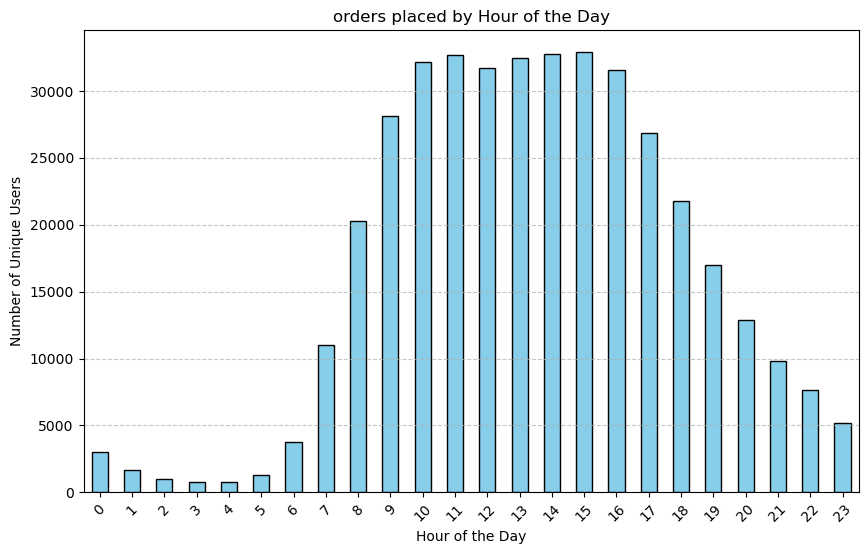

In [34]:
import pandas as pd
from matplotlib import pyplot as plt

hourly_order_counts = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize= (10,6))
hourly_order_counts.plot(kind='bar',
                        color='skyblue',
                        edgecolor= 'black',)

plt.title('orders placed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique Users')
plt.xticks(range(24), range(24), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.
    
In markdown 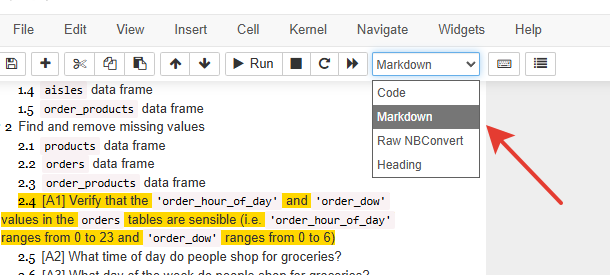    

<div class="alert alert-info"> <b>Student сomments:</b> data shows that the most orders are placed between the hours of 10am and 5pm, this would obviously vary per timezone </div>  

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great

### [A2] What time of day do people shop for groceries?

### [A3] What day of the week do people shop for groceries?

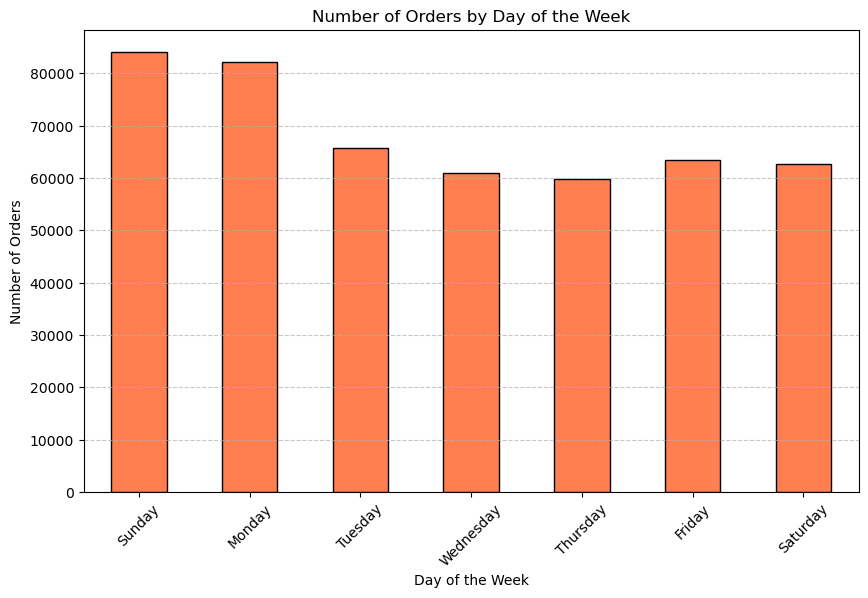

In [35]:
daily_order_counts = df_orders['order_dow'].value_counts().sort_index()


plt.figure(figsize=(10,6))
daily_order_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-info"> <b>Student сomments:</b> this data displays more orders take place to begin the week on either Sunday or Monday </div>  

### [A4] How long do people wait until placing another order?

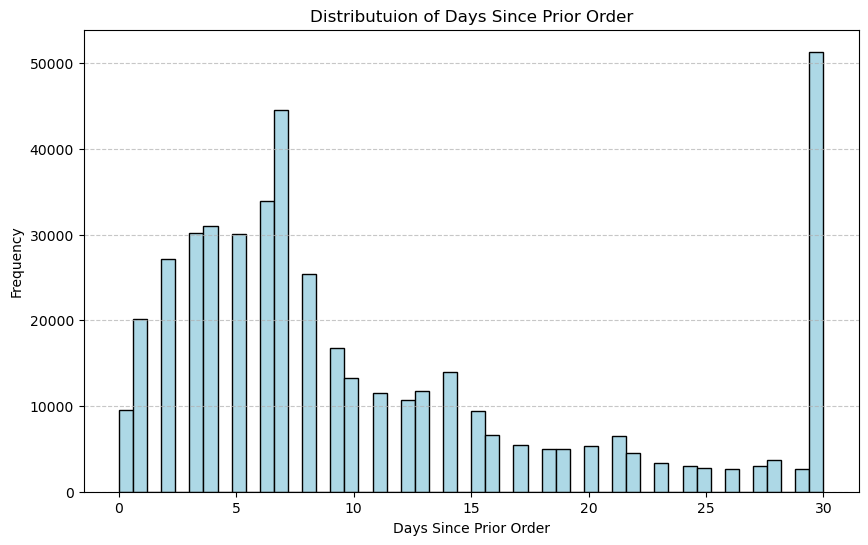

In [36]:
plt.figure(figsize=(10,6))
df_orders['days_since_prior_order'].plot(kind='hist', bins=50, color='lightblue', edgecolor='black')
plt.title('Distributuion of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

In [37]:
min_days = df_orders['days_since_prior_order'].min()
max_days = df_orders['days_since_prior_order'].max()

print(f"Minimum days since prior order: {min_days}")
print(f"Maximum days since prior order: {max_days}")

Minimum days since prior order: 0.0
Maximum days since prior order: 30.0


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [38]:
#filter data for Wednesday and Saturdays 
wed_orders = df_orders[df_orders['order_dow'] == 2]['order_hour_of_day']
sat_orders = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day']
display(wed_orders) 
display(sat_orders)

19        10
32        17
41        15
46        17
51        10
          ..
478951    17
478953    18
478957    14
478960    15
478964    11
Name: order_hour_of_day, Length: 65833, dtype: int64

0         13
11        16
14        11
20         9
26        18
          ..
478924    10
478930    19
478943    10
478954    21
478961    10
Name: order_hour_of_day, Length: 62649, dtype: int64

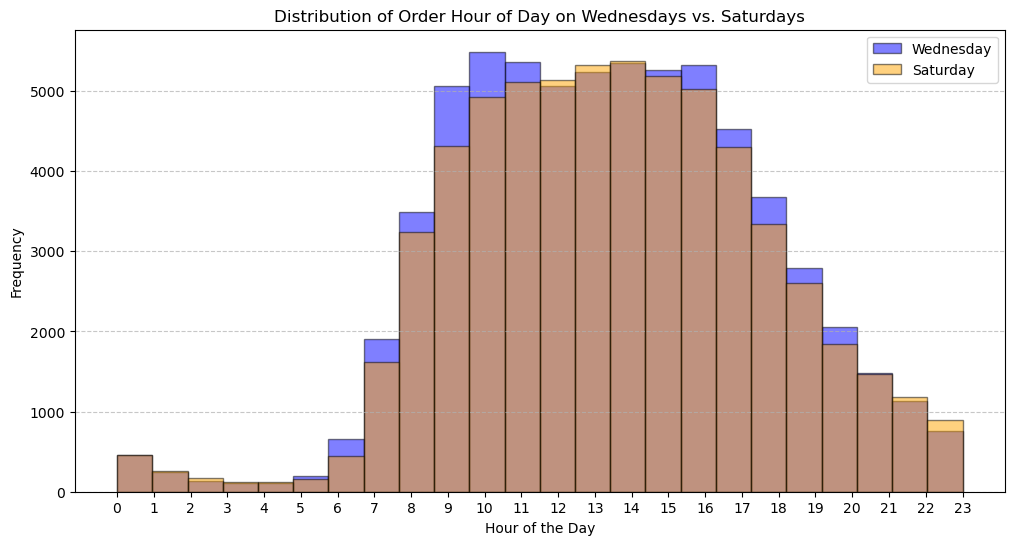

In [39]:
plt.figure(figsize=(12,6))
plt.hist(wed_orders, bins=24, alpha=0.5, label='Wednesday', color='blue', edgecolor='black')
plt.hist(sat_orders, bins=24, alpha=0.5, label='Saturday', color='orange', edgecolor='black')

plt.title('Distribution of Order Hour of Day on Wednesdays vs. Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.show()

### [B2] What's the distribution for the number of orders per customer?

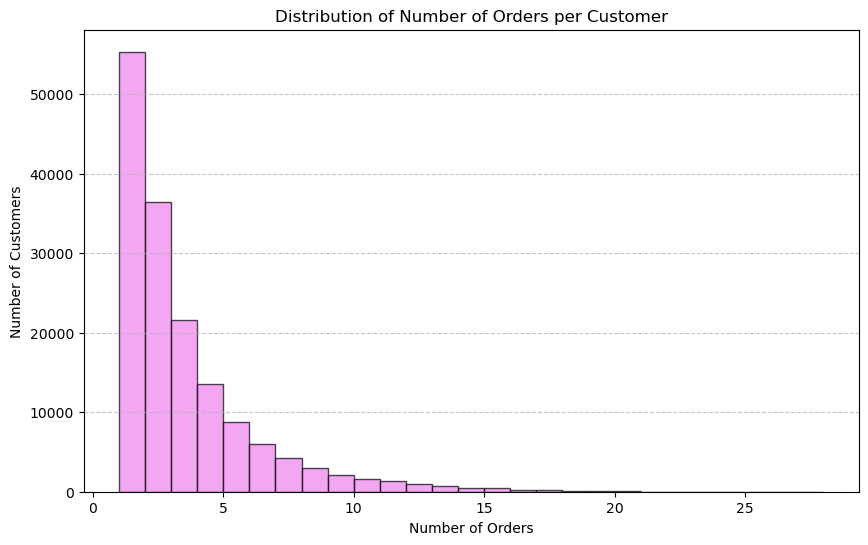

In [40]:
orders_per_customer = df_orders['user_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() +1), alpha=0.7, color='violet', edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [41]:
#count the number of times each product is ordered 
product_counts = df_products['product_id'].value_counts()
top_20_products = product_counts.head(20).index
top_20_products

Index([    1, 33146, 33124, 33125, 33126, 33127, 33128, 33129, 33130, 33131,
       33132, 33133, 33134, 33135, 33136, 33137, 33138, 33139, 33140, 33141],
      dtype='int64', name='product_id')

In [42]:
#merge with products data
df_top_products = df_products[df_products['product_id'].isin(top_20_products)]

In [43]:
#display the top 20 products relevant columns
df_top_products = df_top_products[['product_id', 'product_name']]
(df_top_products)

,product_id,product_name
0,1,chocolate sandwich cookies
33123,33124,healthy kids organic chocolate nutritional shake
33124,33125,organic mini cheddar cheese crackers
33125,33126,sesame flatbread
33126,33127,no salt roasted pistachios
33127,33128,riccardo balsamic vinegar
33128,33129,classic hummus
33129,33130,organic salt free cabbage dill raw sauerkrat
33130,33131,hair remover wax strip kit
33131,33132,mild red taco sauce


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [44]:
#calculate the number of items per order
items_per_order = df_order_products.groupby('order_id')['product_id'].count().reset_index(name='items_per_order')


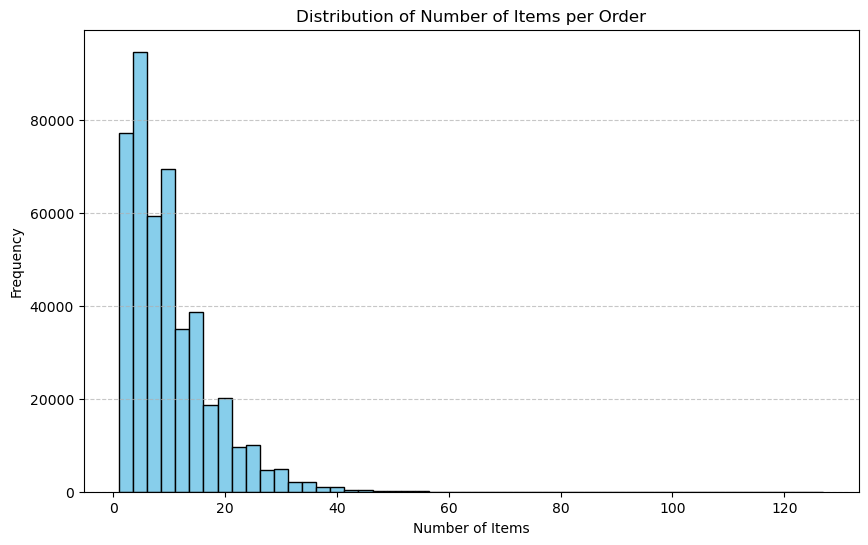

In [45]:
plt.figure(figsize=(10,6))
plt.hist(items_per_order['items_per_order'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [46]:
#calculate the number of reorders for each product
product_reorder_counts = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['reordered'].count().reset_index(name='reorder-count')

(product_reorder_counts)

,product_id,reorder-count
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36223,49690,4
36224,49691,31
36225,49692,5
36226,49693,11


In [47]:
#sort by reorder count and get top 20 products
top_20_reordered_products = product_reorder_counts.sort_values(by='reorder-count', ascending=False).head(20)
(top_20_reordered_products)

,product_id,reorder-count
18104,24852,55763
9528,13176,44450
15368,21137,28639
15936,21903,26233
34407,47209,23629
34828,47766,18743
20285,27845,16251
34725,47626,15044
20375,27966,14748
12193,16797,13945


In [48]:
#merge with the order products dataframe
top_20_reordered_products = pd.merge(top_20_reordered_products, df_order_products[['product_id']], on='product_id')

top_20_reordered_products = top_20_reordered_products[['product_id', 'reorder-count']]

(top_20_reordered_products)

,product_id,reorder-count
0,24852,55763
1,24852,55763
2,24852,55763
3,24852,55763
4,24852,55763
...,...,...
465663,49235,8389
465664,49235,8389
465665,49235,8389
465666,49235,8389


### [C3] For each product, what proportion of its orders are reorders?

In [49]:
#calculate total orders and reorders for each product
product_order_counts = df_order_products.groupby('product_id')['order_id'].count().reset_index(name='total_orders')
product_reorder_counts = df_order_products.groupby('product_id')['reordered'].sum().reset_index(name='reorders')

print(product_order_counts)
print(product_reorder_counts)

       product_id  total_orders
0               1           280
1               2            11
2               3            42
3               4            49
4               7             2
...           ...           ...
45568       49690             5
45569       49691            72
45570       49692            12
45571       49693            25
45572       49694             9

[45573 rows x 2 columns]
       product_id  reorders
0               1       158
1               2         0
2               3        31
3               4        25
4               7         1
...           ...       ...
45568       49690         4
45569       49691        31
45570       49692         5
45571       49693        11
45572       49694         3

[45573 rows x 2 columns]


In [50]:
#merge the total orders and reorder counts, then calculate the proportion
product_reorder_proportion = pd.merge(product_order_counts, product_reorder_counts, on='product_id')
#calculate reorder proportion
product_reorder_proportion['reorder_proportion'] = product_reorder_proportion['reorders'] / product_reorder_proportion['total_orders']

In [51]:
final_table = pd.merge(product_reorder_proportion, df_order_products[['product_id',]], on='product_id')
final_table = final_table[['product_id', 'reorder_proportion']]
print(final_table.head(20))
    

    product_id  reorder_proportion
0            1            0.564286
1            1            0.564286
2            1            0.564286
3            1            0.564286
4            1            0.564286
5            1            0.564286
6            1            0.564286
7            1            0.564286
8            1            0.564286
9            1            0.564286
10           1            0.564286
11           1            0.564286
12           1            0.564286
13           1            0.564286
14           1            0.564286
15           1            0.564286
16           1            0.564286
17           1            0.564286
18           1            0.564286
19           1            0.564286


### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


It would be nice to add an overall output for the projec
</div>

<div class="alert alert-info"> <b>Student сomments:</b> Overall I found the project to be a bit challenging, i do wish there was a bit more direction as sometimes with the empty cell blocks im not positive on what is being asked of me to do which kind of disrupts momentum when i get going. Something im learning to work through. </div>  

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊